# Compression

This notebook contains exercise using orthogonal transformations (Fourier and Wavelet) to compress images.

### Sources

* [Data Driven Science & Engineering](http://databookuw.com/databook.pdf)
* [Fourier Analysis Video Series](https://www.youtube.com/playlist?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC)
* [Denoising Data with Fast Fourier Transform](https://kinder-chen.medium.com/denoising-data-with-fast-fourier-transform-a81d9f38cc4c)

### Setup

In [1]:
import sys

sys.path.append("../../src/")

In [2]:
import os

import numpy as np
import pandas as pd
from skimage import io
from sklearn import metrics

from src.fourier import apply_rgb, FourierTransform2D, WaveletTransform2D, compress_and_decompress

### Dataset

Load test images to dict.

In [3]:
images = {}

for image_path in os.listdir("../../data/"):
    if image_path .endswith(".jpg"):
        image = io.imread(f"../../data/{image_path }")
        name, suffix = image_path.split(".")
        images[name] = image

In [4]:
images.keys()

dict_keys(['circle', 'image', 'milky-way', 'mond', 'namib', 'panda'])

# Fourier Transform

Fourier transform can compress most images with up to 90% compression, without visible quality loss. Example using image of red panda and 90% removed coefficients.

c:\users\kzaja\documents\research\github\frequency-neural-networks\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


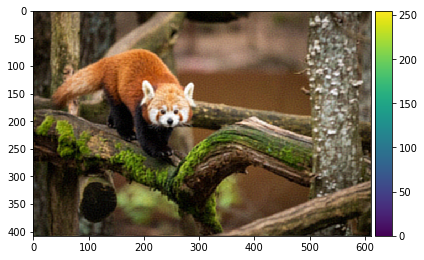

In [5]:
decompressed_image = apply_rgb(compress_and_decompress, images["panda"], transform=FourierTransform2D(), compression=0.90)
_ = io.imshow(np.clip(decompressed_image.astype(int), 0, 255))

### Table

Run compression on all images and compare MAE and compression levels.

In [6]:
summary = []

for name, image in images.items():
    for compression in (0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.98, 0.99, 0.999):
        decompressed_image = apply_rgb(compress_and_decompress, image, transform=FourierTransform2D(), compression=compression)
        decompressed_image = np.clip(decompressed_image.astype(int), 0, 255)
        error = metrics.mean_absolute_error(y_true=image.flatten(), y_pred=decompressed_image.flatten()) / image.max()
        summary.append({"image": name, "compression": compression, "error": error})

In [7]:
pd.DataFrame.from_dict(summary).head(10)

,image,compression,error
0,circle,0.000,0.001452
1,circle,0.100,0.001847
2,circle,0.300,0.004566
3,circle,0.500,0.007446
4,circle,0.700,0.009808
5,circle,0.900,0.011098
6,circle,0.950,0.013024
7,circle,0.980,0.017691
8,circle,0.990,0.023254
9,circle,0.999,0.054566


# Wavelet Compression

Wavelet transform in this implementatation works the same as Fourier, but using a different transformation, which allows better compression. 
Different wavelet transforms can be used with different levels, this example show compression with 3-level `db1`.

c:\users\kzaja\documents\research\github\frequency-neural-networks\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


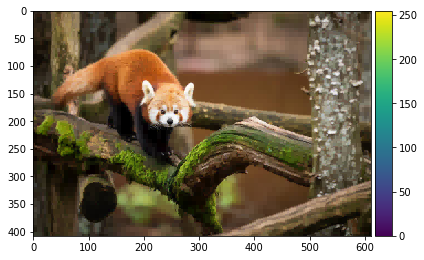

In [8]:
decompressed_image = apply_rgb(compress_and_decompress, images["panda"], transform=WaveletTransform2D(wavelet_name="db1", level=3), compression=0.95)
_ = io.imshow(np.clip(decompressed_image.astype(int), 0, 255))